In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
data = pd.read_csv('higgs-boson/training.csv')

# replace -999.0 (missng values) with NaN
nan_list = {}
for col in data.columns:
    if -999.0 in data[col].value_counts().keys():
        nan = {str(col): data[col].value_counts()[-999.0]}
        nan_list.update(nan)
nan_df = pd.DataFrame(list(nan_list.items()), columns=['Columns', 'Num -999 Values'])
data[nan_df["Columns"]] = data[nan_df["Columns"]].replace({-999.0:np.nan})

# correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

data = data.drop(to_drop, axis=1)

In [74]:
data = data.dropna()

In [75]:
data.shape

(68114, 30)

In [76]:
X = data.drop("Label", axis=1)
y = data["Label"]
print(X.shape, y.shape)

(68114, 29) (68114,)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [41]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', tree.DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [48]:
names = []
scores = []
predictions = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    prediction = model_selection.cross_val_predict(model, X_test, y_test, cv=kfold)
    names.append(name)
    scores.append(cv_scores)
    predictions.append(prediction)
    print(f"{name}: {cv_scores.mean()}, {cv_scores.std()}")

LR: 0.7052168674347923, 0.004940675653440357
DTC: 1.0, 0.0
RFC: 1.0, 0.0
LDA: 0.830224370278439, 0.004140191672629437
KNN: 0.6214156103291243, 0.005609655008589673
SGD: 0.5667416989350255, 0.08083604660099566
GBC: 1.0, 0.0


In [10]:
scaling = MinMaxScaler().fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [11]:
SVC = SVC(kernel='linear')
SVC.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
SVC.score(X_test_scaled, y_test)

0.9433906864760115

In [13]:
target_names = ["s", "b"]
predictions = SVC.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           s       0.99      0.90      0.94      9055
           b       0.90      0.99      0.94      7974

    accuracy                           0.94     17029
   macro avg       0.94      0.95      0.94     17029
weighted avg       0.95      0.94      0.94     17029



In [14]:
names

['LR', 'DTC', 'RFC', 'LDA', 'KNN', 'SGD', 'GBC']

In [15]:
scores

[array([0.70737913, 0.70346447, 0.70444314, 0.69896261, 0.70816207,
        0.70693031, 0.69459671, 0.70732185, 0.71299922, 0.70790916]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99980423, 1.        ]),
 array([0.83088667, 0.82501468, 0.82481895, 0.82560188, 0.832844  ,
        0.83124511, 0.82791699, 0.83085356, 0.83633516, 0.8367267 ]),
 array([0.61773341, 0.61342729, 0.62086514, 0.61421022, 0.62438833,
        0.61491778, 0.62823023, 0.62607674, 0.6270556 , 0.62725137]),
 array([0.59933451, 0.66157761, 0.45566647, 0.64141711, 0.46623605,
        0.4972592 , 0.6495693 , 0.55833986, 0.61452623, 0.61863743]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [16]:
svc_scores = model_selection.cross_val_score(SVC, X_train_scaled, y_train, cv=10, scoring="accuracy")

In [51]:
svc_predictions = model_selection.cross_val_predict(SVC, X_test_scaled, y_test, cv=10)
svc_predictions

array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object)

In [66]:
names.append('SVC')
names

['LR', 'DTC', 'RFC', 'LDA', 'KNN', 'SGD', 'GBC', 'SVC']

In [169]:
scores.append(svc_scores)
scores

[array([0.70737913, 0.70346447, 0.70444314, 0.69896261, 0.70816207,
        0.70693031, 0.69459671, 0.70732185, 0.71299922, 0.70790916]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.83088667, 0.82501468, 0.82481895, 0.82560188, 0.832844  ,
        0.83124511, 0.82791699, 0.83085356, 0.83633516, 0.8367267 ]),
 array([0.61773341, 0.61342729, 0.62086514, 0.61421022, 0.62438833,
        0.61491778, 0.62823023, 0.62607674, 0.6270556 , 0.62725137]),
 array([0.65981601, 0.59326678, 0.65511842, 0.4599726 , 0.46584459,
        0.46339076, 0.54698512, 0.66483947, 0.63194988, 0.52623336]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.9354081 , 0.93305931, 0.93971423, 0.93814837, 0.94402036,
        0.93500392, 0.94283477, 0.93402506, 0.94107283, 0.9371574 ])]

In [19]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=29))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 13,302
Trainable params: 13,302
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 5s - loss: 0.2675 - acc: 0.8840
Epoch 2/10
 - 5s - loss: 0.0590 - acc: 0.9859
Epoch 3/10
 - 5s - loss: 0.0079 - acc: 0.9994
Epoch 4/10
 - 5s - loss: 0.0036 - acc: 0.9993
Epoch 5/10
 - 5s - loss: 5.9229e-04 - acc: 1.0000
Epoch 6/10
 - 5s - loss: 0.0465 - acc: 0.9954
Epoch 7/10
 - 5s - loss: 4.2902e-04 - acc: 1.0000
Epoch 8/10
 - 5s - loss: 1.8837e-04 - acc: 1.0000
Epoch 9/10
 - 5s - loss: 1.1570e-04 - acc: 1.0000
Epoch 10/10
 - 5s - loss: 7.6516e-05 - acc: 1.0000


In [27]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 1s - loss: 7.1348e-05 - acc: 1.0000
Deep Neural Network - Loss: 7.134772713196218e-05, Accuracy: 1.0


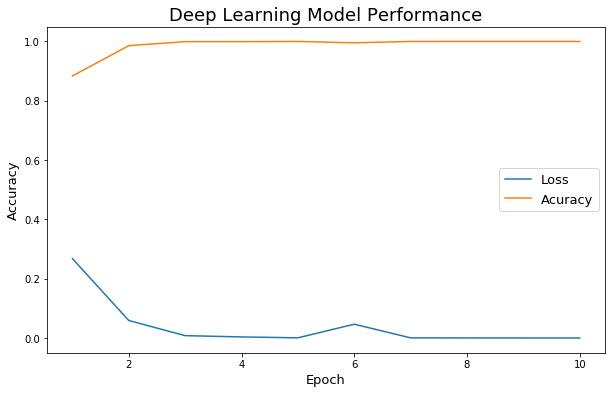

In [161]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), history.history['loss'])
plt.plot(range(1, 11), history.history['acc'])
plt.title("Deep Learning Model Performance", fontsize=18)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.legend(['Loss', 'Acuracy'], prop={'size': 13})
plt.savefig("deep_learning_performance.png")

In [53]:
deep_model_predictions = deep_model.predict_classes(X_test_scaled)

array([0, 1, 0, ..., 0, 0, 1])

In [61]:
deep_model_sb_predictions = []
for item in deep_model_predictions:
    if item == 0:
        deep_model_sb_predictions.append('b')
    else:
        deep_model_sb_predictions.append('s')
deep_model_sb_predictions

['b',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 's',
 's',
 's',
 'b',
 'b',
 'b',
 's',
 's',
 's',
 's',
 's',
 'b',
 's',
 'b',
 'b',
 'b',
 's',
 's',
 's',
 'b',
 'b',
 's',
 'b',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 'b',
 's',
 's',
 's',
 's',
 'b',
 'b',
 's',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 'b',
 's',
 's',
 'b',
 's',
 's',
 'b',
 's',
 's',
 's',
 's',
 'b',
 'b',
 's',
 's',
 's',
 's',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 'b',
 's',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 's',
 's',
 's',
 's',
 'b',
 'b',
 's',
 's',
 'b',
 's',
 'b',
 'b',
 's',
 'b',
 's',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 's',
 'b',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 'b',
 'b',
 'b',
 's',
 's',
 'b',
 's',
 's',
 'b',
 'b',
 'b',
 'b',
 's',
 's',
 's',
 'b',
 's',
 'b',
 'b',
 'b',
 'b',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 's',
 's',
 'b',
 'b',
 'b',
 's',
 'b',
 's',
 'b',
 'b',
 's',
 's'

In [170]:
names.append('DL')
scores.append(history.history['acc'])

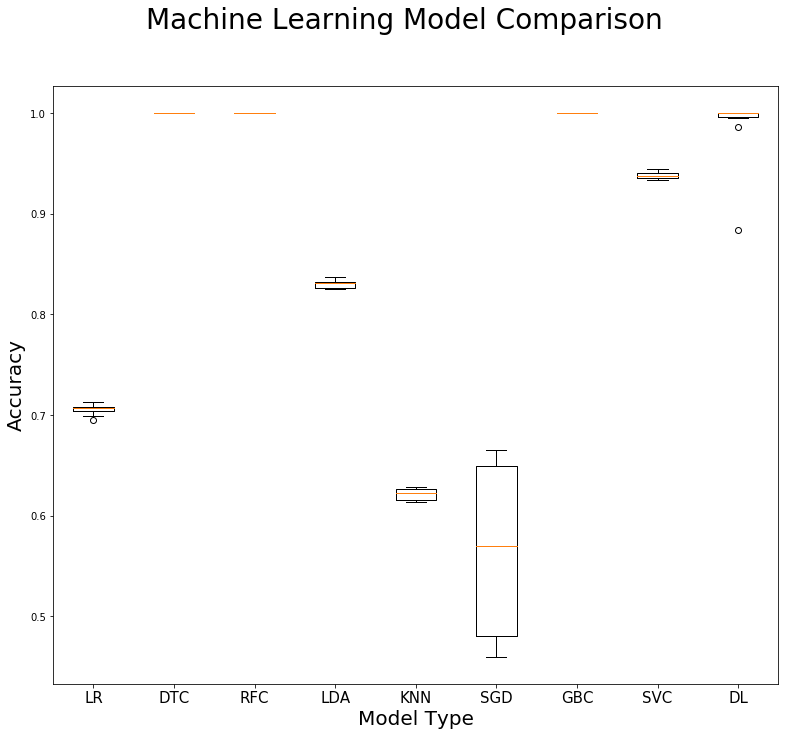

In [173]:
fig_a = plt.figure(figsize=(13,11))
fig_a.suptitle('Machine Learning Model Comparison', fontsize=28)
ax = fig_a.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names, fontsize=15)
plt.xlabel("Model Type", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.savefig("model_comparison_boxplots.png")
plt.show()

In [31]:
scores

[array([0.70737913, 0.70346447, 0.70444314, 0.69896261, 0.70816207,
        0.70693031, 0.69459671, 0.70732185, 0.71299922, 0.70790916]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99980423, 1.        ]),
 array([0.83088667, 0.82501468, 0.82481895, 0.82560188, 0.832844  ,
        0.83124511, 0.82791699, 0.83085356, 0.83633516, 0.8367267 ]),
 array([0.61773341, 0.61342729, 0.62086514, 0.61421022, 0.62438833,
        0.61491778, 0.62823023, 0.62607674, 0.6270556 , 0.62725137]),
 array([0.59933451, 0.66157761, 0.45566647, 0.64141711, 0.46623605,
        0.4972592 , 0.6495693 , 0.55833986, 0.61452623, 0.61863743]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.9354081 , 0.93305931, 0.93971423, 0.93814837, 0.94402036,
        0.93500392, 0.94283477, 0.93402506, 0.94107283, 0.9371574 ]),
 [0.8839581,
  0.98592544,
  0.9993736,
  0.99933445,
  0.99998045,
  0.

In [32]:
df_scores = pd.DataFrame(scores).transpose()

In [33]:
df_scores

,0,1,2,3,4,5,6,7,8
0,0.707379,1.0,1.000000,0.830887,0.617733,0.599335,1.0,0.935408,0.883958
1,0.703464,1.0,1.000000,0.825015,0.613427,0.661578,1.0,0.933059,0.985925
2,0.704443,1.0,1.000000,0.824819,0.620865,0.455666,1.0,0.939714,0.999374
3,0.698963,1.0,1.000000,0.825602,0.614210,0.641417,1.0,0.938148,0.999334
4,0.708162,1.0,1.000000,0.832844,0.624388,0.466236,1.0,0.944020,0.999980
5,0.706930,1.0,1.000000,0.831245,0.614918,0.497259,1.0,0.935004,0.995439
6,0.694597,1.0,1.000000,0.827917,0.628230,0.649569,1.0,0.942835,0.999980
7,0.707322,1.0,1.000000,0.830854,0.626077,0.558340,1.0,0.934025,1.000000
8,0.712999,1.0,0.999804,0.836335,0.627056,0.614526,1.0,0.941073,1.000000
9,0.707909,1.0,1.000000,0.836727,0.627251,0.618637,1.0,0.937157,1.000000


In [34]:
df_scores.columns = names

In [35]:
df_scores

,LR,DTC,RFC,LDA,KNN,SGD,GBC,SVC,DL
0,0.707379,1.0,1.000000,0.830887,0.617733,0.599335,1.0,0.935408,0.883958
1,0.703464,1.0,1.000000,0.825015,0.613427,0.661578,1.0,0.933059,0.985925
2,0.704443,1.0,1.000000,0.824819,0.620865,0.455666,1.0,0.939714,0.999374
3,0.698963,1.0,1.000000,0.825602,0.614210,0.641417,1.0,0.938148,0.999334
4,0.708162,1.0,1.000000,0.832844,0.624388,0.466236,1.0,0.944020,0.999980
5,0.706930,1.0,1.000000,0.831245,0.614918,0.497259,1.0,0.935004,0.995439
6,0.694597,1.0,1.000000,0.827917,0.628230,0.649569,1.0,0.942835,0.999980
7,0.707322,1.0,1.000000,0.830854,0.626077,0.558340,1.0,0.934025,1.000000
8,0.712999,1.0,0.999804,0.836335,0.627056,0.614526,1.0,0.941073,1.000000
9,0.707909,1.0,1.000000,0.836727,0.627251,0.618637,1.0,0.937157,1.000000


<Figure size 432x288 with 0 Axes>

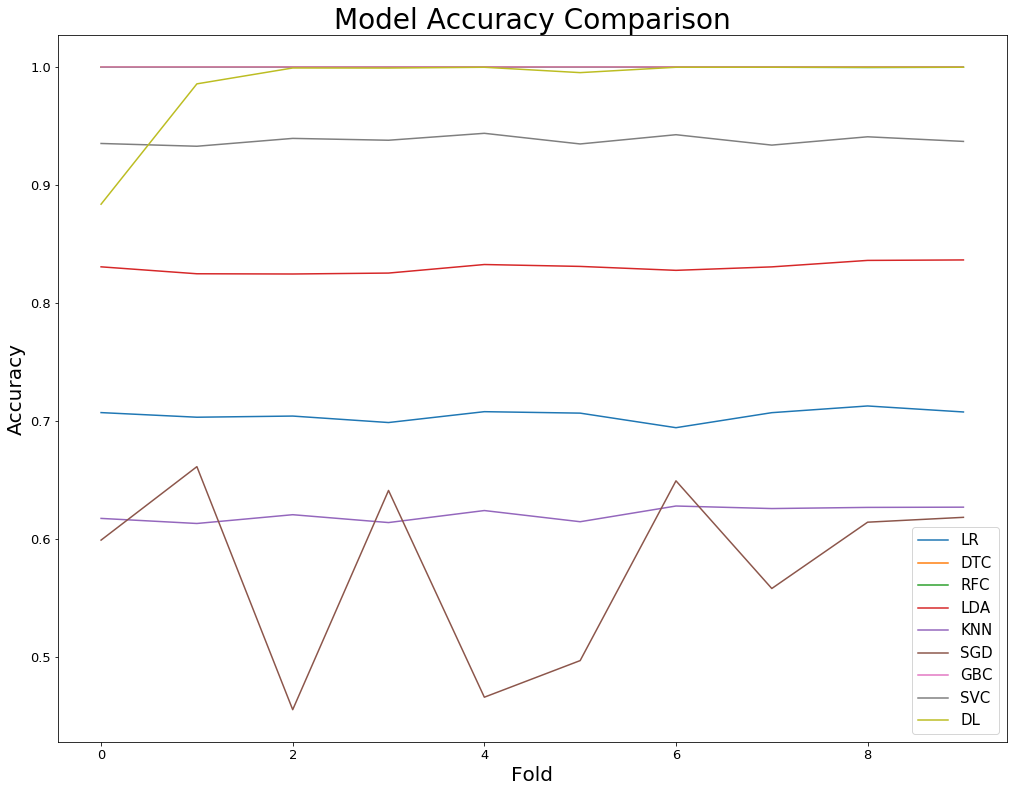

In [172]:
plt.figure()
df_scores.plot(figsize=(17,13))
plt.title("Model Accuracy Comparison", fontsize=28)
plt.xlabel("Fold", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.tick_params(axis='both', labelsize=13)
plt.legend(prop={'size': 15})
plt.savefig("model_comparison_line_graph.png")

In [60]:
predictions

[array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype='<U1'),
 array(['b', 'b', 'b', ..., 's', 'b', 'b'], dtype=object),
 array(['b', 'b', 'b', ..., 'b', 'b', 'b'], dtype='<U1'),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object)]

In [63]:
predictions.append(svc_predictions)
predictions.append(deep_model_sb_predictions)
predictions

[array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype='<U1'),
 array(['b', 'b', 'b', ..., 's', 'b', 'b'], dtype=object),
 array(['b', 'b', 'b', ..., 'b', 'b', 'b'], dtype='<U1'),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 array(['b', 's', 'b', ..., 'b', 'b', 's'], dtype=object),
 ['b',
  's',
  'b',
  'b',
  'b',
  's',
  'b',
  's',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  's',
  's',
  's',
  'b',
  'b',
  'b',
  's',
  's',
  's',
  's',
  's',
  'b',
  's',
  'b',
  'b',
  'b',
  's',
  's',
  's',
  'b',
  'b',
  's',
  'b',
  'b',
  'b',
  'b',
  's',
  'b',
  's',
  'b',
  's',
  's',
  's',
  's',
  'b',
  'b',
  's',
  's',
  'b',
  'b',
  'b',
  's',
  'b',
  'b',
  's',
  's',
  'b',
  's',
  's',
  'b',
  's',
  's',
  's',
  's',
  'b',
  'b',
  's',
  's',
  's',
  's',
  's'

In [69]:
predictions_df = pd.DataFrame(predictions).transpose()
predictions_df.columns = names
predictions_df

,LR,DTC,RFC,LDA,KNN,SGD,GBC,SVC,DL
0,b,b,b,b,b,b,b,b,b
1,s,s,s,s,b,b,s,s,s
2,b,b,b,b,b,b,b,b,b
3,s,b,b,b,b,b,b,b,b
4,b,b,b,b,s,b,b,b,b
5,s,s,s,s,b,b,s,s,s
6,b,b,b,b,b,b,b,b,b
7,s,s,s,s,s,b,s,s,s
8,b,b,b,b,s,b,b,b,b
9,s,b,b,s,b,b,b,b,b


In [89]:
predictions_vs_actual = pd.concat([predictions_df, pd.Series(y_test).reset_index(drop=True)], axis=1)
predictions_vs_actual

,LR,DTC,RFC,LDA,KNN,SGD,GBC,SVC,DL,Label
0,b,b,b,b,b,b,b,b,b,b
1,s,s,s,s,b,b,s,s,s,s
2,b,b,b,b,b,b,b,b,b,b
3,s,b,b,b,b,b,b,b,b,b
4,b,b,b,b,s,b,b,b,b,b
5,s,s,s,s,b,b,s,s,s,s
6,b,b,b,b,b,b,b,b,b,b
7,s,s,s,s,s,b,s,s,s,s
8,b,b,b,b,s,b,b,b,b,b
9,s,b,b,s,b,b,b,b,b,b


In [115]:
prediction_counts = pd.DataFrame(predictions_vs_actual.apply(pd.Series.value_counts))
prediction_counts

,LR,DTC,RFC,LDA,KNN,SGD,GBC,SVC,DL,Label
b,9555,9055,9055,7882,9369,10779,9055,7392,9055,9055
s,7474,7974,7974,9147,7660,6250,7974,9637,7974,7974


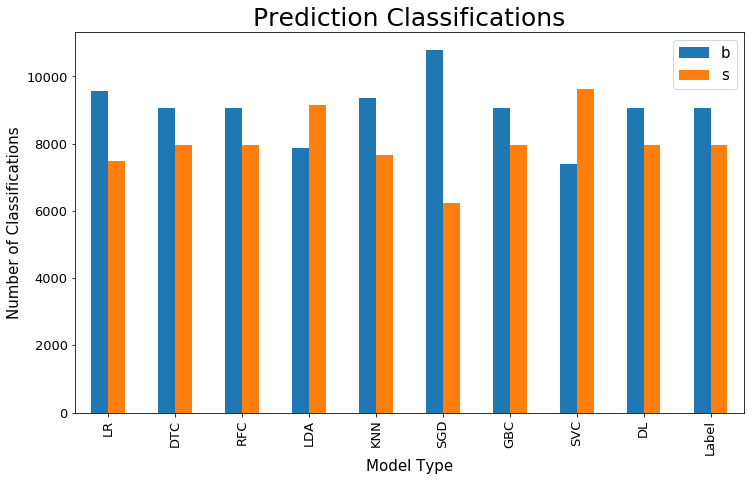

In [174]:
prediction_counts.transpose().plot.bar(figsize=(12, 7))
plt.title("Prediction Classifications", fontsize=25)
plt.legend(prop={'size': 15})
plt.xlabel("Model Type", fontsize=15)
plt.ylabel("Number of Classifications", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.savefig("model_class_prediction_comparison.png")